In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 서울시 가구원 2019년도

In [2]:
soup = pd.read_csv('./cctv/서울가구원_2015.tsv', sep='\t', header=1)
soup.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [3]:
soup.rename({'기간': '기간', '구분': '구별', '일반가구수': '일반가구수', '1인': '1인',
            '2인': '2인', '3인' : '3인', '4인':'4인', '5인' :'5인', '6인':'6인', '7인 이상':'7인이상', '평균가구원수': '평균가구원수'}, inplace=True, axis=1)
soup.head()

,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [4]:
soup.drop([0], inplace= True)
soup.head()

,기간,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
5,2019,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [5]:
soup2 = soup[['구별','일반가구수','1인','2인','3인','4인','5인','6인','7인이상','평균가구원수']]
soup2.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
1,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3
5,광진구,"149,905","58,714","35,678","28,054","21,454","4,711","1,006",288,2.2


In [6]:
soup2['일반가구수'] = soup2['일반가구수'].map(lambda s: int(s.replace(',','')))
soup2['1인'] = soup2['1인'].map(lambda s: int(s.replace(',','')))
soup2['2인'] = soup2['2인'].map(lambda s: int(s.replace(',','')))
soup2['3인'] = soup2['3인'].map(lambda s: int(s.replace(',','')))
soup2['4인'] = soup2['4인'].map(lambda s: int(s.replace(',','')))
soup2['5인'] = soup2['5인'].map(lambda s: int(s.replace(',','')))
soup2['6인'] = soup2['6인'].map(lambda s: int(s.replace(',','')))
soup2['7인이상'] = soup2['7인이상'].map(lambda s: int(s.replace(',','')))

In [7]:
soup2.tail()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
21,관악구,242154,119863,55423,34875,24563,5806,1283,341,2.0
22,서초구,155377,42667,38892,35327,29850,6704,1503,434,2.5
23,강남구,206524,66073,51560,43435,35800,7671,1564,421,2.4
24,송파구,252212,68861,65402,57821,47607,10014,2038,469,2.5
25,강동구,162976,45188,43297,36735,29461,6606,1333,356,2.5


In [8]:
soup2['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

### 서울시 인구 현황

In [9]:
pop = pd.read_csv('./cctv/서울시 인구.tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [10]:
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [11]:
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [12]:
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [13]:
pop.drop([0], inplace= True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [14]:
# 외국인 비율 & 고령자 비율 추가 
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [15]:
# 인구수 기준 정렬(내림차순)
pop.sort_values(by='인구수', ascending=False).head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [16]:
# merge를 사용하여 병합
drf = pd.merge(pop, soup2, on='구별')
drf.tail(11)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
14,양천구,460048,456240,3808,64804,0.827740,14.086356,162867,36345,41435,40897,35189,7272,1393,336,2.6
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,37325,8458,1707,435,2.3
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,26459,6214,1261,380,2.4
17,금천구,249641,232157,17484,39361,7.003657,15.767041,99315,37778,25207,18771,13535,3131,708,185,2.2
18,영등포구,405982,375630,30352,60826,7.476194,14.982438,153923,58214,38671,29661,21503,4597,1032,245,2.2
19,동작구,404617,393554,11063,64674,2.734191,15.984005,164963,60088,40739,32514,24570,5564,1204,284,2.3
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,24563,5806,1283,341,2.0
21,서초구,429995,426009,3986,59495,0.926988,13.836207,155377,42667,38892,35327,29850,6704,1503,434,2.5
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,35800,7671,1564,421,2.4
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,47607,10014,2038,469,2.5


In [21]:
drf1 = drf

In [22]:
drf1.tail(10)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,37325,8458,1707,435,2.3
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,26459,6214,1261,380,2.4
17,금천구,249641,232157,17484,39361,7.003657,15.767041,99315,37778,25207,18771,13535,3131,708,185,2.2
18,영등포구,405982,375630,30352,60826,7.476194,14.982438,153923,58214,38671,29661,21503,4597,1032,245,2.2
19,동작구,404617,393554,11063,64674,2.734191,15.984005,164963,60088,40739,32514,24570,5564,1204,284,2.3
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,24563,5806,1283,341,2.0
21,서초구,429995,426009,3986,59495,0.926988,13.836207,155377,42667,38892,35327,29850,6704,1503,434,2.5
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,35800,7671,1564,421,2.4
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,47607,10014,2038,469,2.5
24,강동구,462275,458058,4217,68798,0.912228,14.882483,162976,45188,43297,36735,29461,6606,1333,356,2.5


In [23]:
# 인구수가 가장 많은 지역 5
drf2 = drf1.sort_values(by='인구수', ascending=False).head(10)
drf2

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,47607,10014,2038,469,2.5
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,37325,8458,1707,435,2.3
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,35800,7671,1564,421,2.4
10,노원구,529532,525486,4046,84612,0.764071,15.978638,201458,53365,52832,46783,38952,7772,1447,307,2.5
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,24563,5806,1283,341,2.0
11,은평구,485842,481546,4296,84353,0.884238,17.362229,184890,52814,52257,40789,29700,7303,1604,423,2.4
24,강동구,462275,458058,4217,68798,0.912228,14.882483,162976,45188,43297,36735,29461,6606,1333,356,2.5
14,양천구,460048,456240,3808,64804,0.827740,14.086356,162867,36345,41435,40897,35189,7272,1393,336,2.6
7,성북구,449871,439719,10152,73370,2.256647,16.309120,176729,57832,44443,37033,28861,6718,1446,396,2.4
16,구로구,435751,405579,30172,69312,6.924138,15.906332,160378,47740,43700,34624,26459,6214,1261,380,2.4


In [24]:
drf2_corr = drf2.corr()
drf2_corr

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
인구수,1.000000,0.994899,-0.344289,0.818138,-0.421365,-0.516592,0.874413,0.400035,0.924571,0.911173,0.818676,0.868178,0.875292,0.582696,-0.054065
내국인,0.994899,1.000000,-0.437246,0.813147,-0.510496,-0.519540,0.854768,0.364481,0.909124,0.924937,0.840649,0.884913,0.886095,0.567150,-0.010051
외국인,-0.344289,-0.437246,1.000000,-0.274072,0.994596,0.229819,-0.159728,0.174170,-0.218454,-0.485063,-0.525225,-0.495875,-0.443455,-0.083598,-0.388450
고령자,0.818138,0.813147,-0.274072,1.000000,-0.338631,0.066157,0.794860,0.404843,0.923663,0.764190,0.586902,0.704003,0.773796,0.512722,-0.190738
외국인비율,-0.421365,-0.510496,0.994596,-0.338631,1.000000,0.268060,-0.257701,0.082721,-0.302951,-0.529980,-0.554768,-0.531081,-0.489512,-0.115666,-0.321163
고령자비율,-0.516592,-0.519540,0.229819,0.066157,0.268060,1.000000,-0.349257,-0.112573,-0.239024,-0.442403,-0.545357,-0.446552,-0.340126,-0.194326,-0.170971
일반가구수,0.874413,0.854768,-0.159728,0.794860,-0.257701,-0.349257,1.000000,0.783725,0.941445,0.640213,0.483364,0.550774,0.629243,0.424985,-0.512891
1인,0.400035,0.364481,0.174170,0.404843,0.082721,-0.112573,0.783725,1.000000,0.588120,0.025587,-0.143366,-0.079970,0.072552,0.103513,-0.917454
2인,0.924571,0.909124,-0.218454,0.923663,-0.302951,-0.239024,0.941445,0.588120,1.000000,0.777075,0.601285,0.710356,0.779554,0.571906,-0.330687
3인,0.911173,0.924937,-0.485063,0.764190,-0.529980,-0.442403,0.640213,0.025587,0.777075,1.000000,0.964083,0.985615,0.918496,0.537052,0.316860


In [25]:
drf2.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율,일반가구수,1인,2인,3인,4인,5인,6인,7인이상,평균가구원수
23,송파구,676673,670331,6342,92149,0.937233,13.617951,252212,68861,65402,57821,47607,10014,2038,469,2.5
15,강서구,589536,583544,5992,88052,1.016393,14.935814,240135,79371,63517,49322,37325,8458,1707,435,2.3
22,강남구,544085,539235,4850,73942,0.891405,13.590156,206524,66073,51560,43435,35800,7671,1564,421,2.4
10,노원구,529532,525486,4046,84612,0.764071,15.978638,201458,53365,52832,46783,38952,7772,1447,307,2.5
20,관악구,514555,498574,15981,78206,3.105790,15.198764,242154,119863,55423,34875,24563,5806,1283,341,2.0


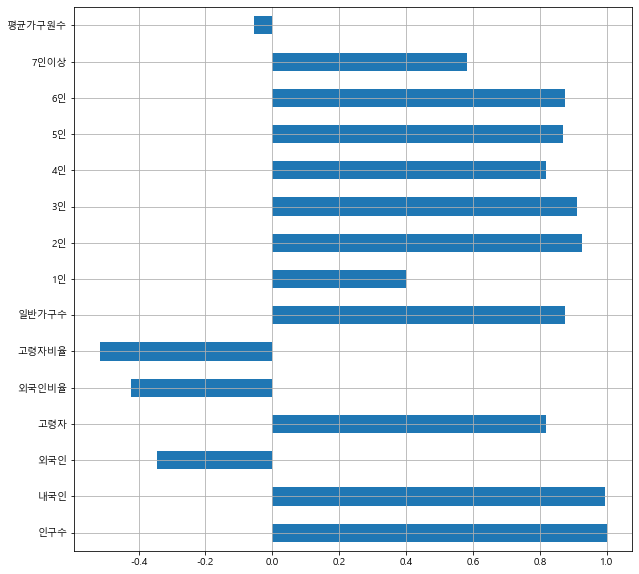

In [29]:
drf2_corr['인구수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

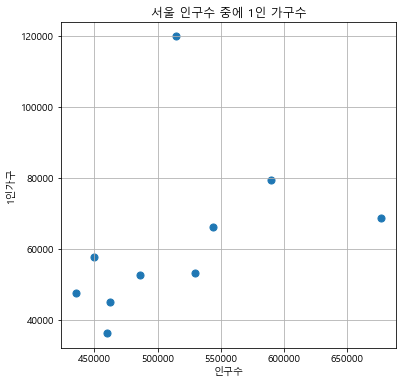

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(drf2['인구수'], drf2['1인'], s=50)
plt.grid(True)
plt.title('서울 인구수 중에 1인 가구수')
plt.xlabel('인구수')
plt.ylabel('1인가구')
plt.show()

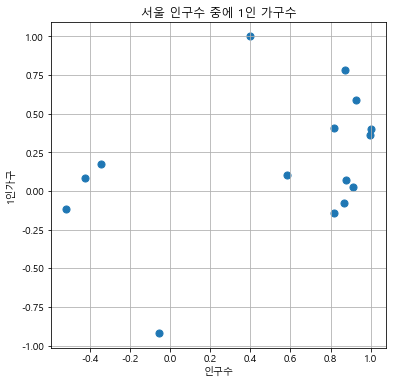

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(drf2_corr['인구수'], drf2_corr['1인'], s=50)
plt.grid(True)
plt.title('서울 전체 인구수 중 1인 가구수')
plt.xlabel('인구수')
plt.ylabel('1인가구')
plt.show()

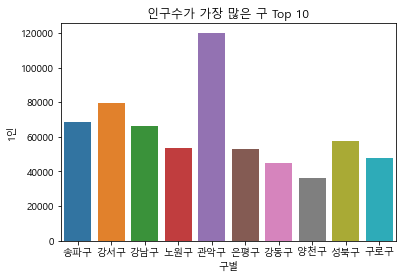

In [27]:
sns.barplot(x="구별", y="1인", data=drf2)
plt.title("인구수가 가장 많은 구 Top 10")
plt.show()

In [36]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(drf2_corr['인구수'], drf2_corr['1인'], 1)
fp1

array([0.29244262, 0.03235266])

In [37]:
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([ 29244.29392617, 204709.86336721])